<a href="https://colab.research.google.com/github/priyadarshi0007/TimeSeries-AIEngineering/blob/master/MovingAverageBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MOVING AVERAGE BASICS

### RFM: Recency, Frequency & Monetory

In [16]:
!pip install download

In [17]:
from __future__ import absolute_import,division,print_function,unicode_literals

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

import pandas as pd

from download import download

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

print("Import Succesfull")

Import Succesfull


In [18]:
def parse(x):
  return datetime.strptime(x, '%m/%d/%Y')

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/electricity_consumption.csv',  parse_dates=['Bill_Date'], date_parser=parse)

In [20]:
print("Rows     :", df.shape[0])
print("Columns  :", df.shape[1])
print("\n Features \n", df.columns.to_list())
print("\n Missing Values \n", df.isnull().any())
print("\n Unique Values \n", df.nunique())

Rows     : 53
Columns  : 6

 Features 
 ['Bill_Date', 'On_peak', 'Off_peak', 'Usage_charge', 'Billed_amount', 'Billing_days']

 Missing Values 
 Bill_Date        False
On_peak          False
Off_peak         False
Usage_charge     False
Billed_amount    False
Billing_days     False
dtype: bool

 Unique Values 
 Bill_Date        53
On_peak          51
Off_peak         53
Usage_charge     53
Billed_amount    52
Billing_days      9
dtype: int64


In [21]:
bill_df = df.set_index('Bill_Date')

In [22]:
bill_df.head(2)

,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
Bill_Date,,,,,
2016-01-01,365,1423.5,219.0,247.73,31
2016-02-01,292,1138.8,175.2,234.11,31


In [52]:
bill_2018 = bill_df['2016':'2018'][['Billed_amount']]

In [24]:
bill_2018

,Billed_amount
Bill_Date,
2016-01-01,247.73
2016-02-01,234.11
2016-03-01,123.85
2016-04-01,111.22
2016-05-01,118.37
2016-06-01,77.81
2016-07-01,86.67
2016-08-01,122.40
2016-09-01,223.62


#Simple Moving Average


   The Simple Moving Average (SMA) is calculated by adding the price of an instrument over a number of time periods and then dividing the sum by the number of time periods. The SMA is basically the average price of the given time period, with equal weighting given to the price of each period.

In financial applications a simple moving average (SMA) is the unweighted mean of the previous n data. However, in science and engineering, the mean is normally taken from an equal number of data on either side of a central value. This ensures that variations in the mean are aligned with the variations in the data rather than being shifted in time.

Mathmatically (t+(t-1)+(t-2)+...+(t-n))/n

Moving Average cant be a great tool when, the data is not stationary and fluctuating.


In [25]:
bill_2018['Billed_amount'].rolling(window=3).mean()

Bill_Date
2016-01-01           NaN
2016-02-01           NaN
2016-03-01    201.896667
2016-04-01    156.393333
2016-05-01    117.813333
2016-06-01    102.466667
2016-07-01     94.283333
2016-08-01     95.626667
2016-09-01    144.230000
2016-10-01    166.186667
2016-11-01    175.566667
2016-12-01    182.483333
2017-01-01    219.516667
2017-02-01    240.776667
2017-03-01    209.833333
2017-04-01    161.550000
2017-05-01    141.170000
2017-06-01    161.350000
2017-07-01    215.483333
2017-08-01    243.746667
2017-09-01    267.820000
2017-10-01    231.653333
2017-11-01    189.500000
2017-12-01    145.206667
2018-01-01    176.750000
2018-02-01    206.696667
2018-03-01    223.860000
2018-04-01    185.040000
2018-05-01    172.280000
2018-06-01    177.896667
2018-07-01    222.270000
2018-08-01    264.630000
2018-09-01    277.363333
2018-10-01    291.766667
2018-11-01    259.546667
2018-12-01    224.340000
Name: Billed_amount, dtype: float64

In [26]:
bill_2018['ma_rolling_3']= bill_2018['Billed_amount'].rolling(window=3).mean().shift(1)

In [27]:
bill_2018

,Billed_amount,ma_rolling_3
Bill_Date,,
2016-01-01,247.73,NaN
2016-02-01,234.11,NaN
2016-03-01,123.85,NaN
2016-04-01,111.22,201.896667
2016-05-01,118.37,156.393333
2016-06-01,77.81,117.813333
2016-07-01,86.67,102.466667
2016-08-01,122.40,94.283333
2016-09-01,223.62,95.626667


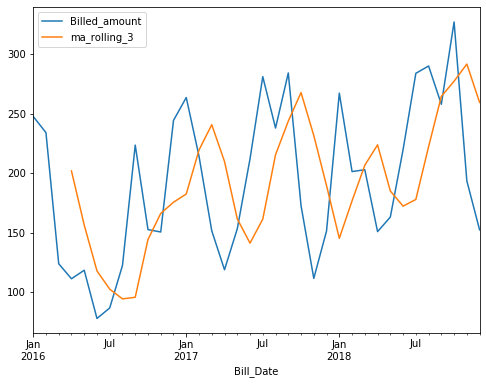

In [28]:
bill_2018.plot()

#Weighted Moving Average

Weighted moving averages can find trens sooner than SMA, on the other hand its complex as we need to assign the weights manually.

In [35]:
def wma(weights):
  def calc(x):
    return (weights*x).mean()
  return calc

In [51]:
#The weights should add up to the window value
bill_2018['wma_rolling_3']= bill_2018['Billed_amount'].rolling(window = 3).apply(wma(np.array([0.5,1,1.5]))).shift(3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  


In [37]:
bill_2018

,Billed_amount,ma_rolling_3,wma_rolling_3
Bill_Date,,,
2016-01-01,247.73,NaN,NaN
2016-02-01,234.11,NaN,NaN
2016-03-01,123.85,NaN,NaN
2016-04-01,111.22,201.896667,NaN
2016-05-01,118.37,156.393333,NaN
2016-06-01,77.81,117.813333,181.250000
2016-07-01,86.67,102.466667,135.911667
2016-08-01,122.40,94.283333,116.900000
2016-09-01,223.62,95.626667,96.898333


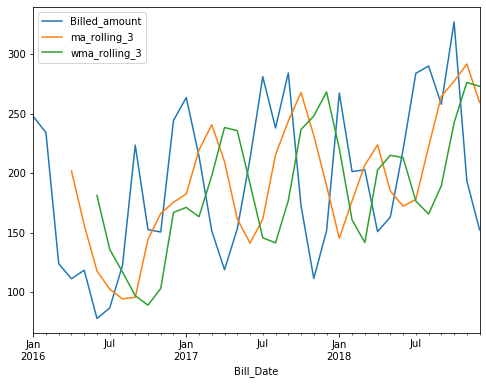

In [38]:
bill_2018.plot()

#Exponential Moving Average

It adopts quickly to the data point changes ,and we dont have to decide the weights manually.

In [39]:
bill_2018['ewm_window_3']= bill_2018['Billed_amount'].ewm(span = 3,adjust = False,min_periods = 0).mean().shift(1)

In [40]:
bill_2018

,Billed_amount,ma_rolling_3,wma_rolling_3,ewm_window_3
Bill_Date,,,,
2016-01-01,247.73,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,247.730000
2016-03-01,123.85,NaN,NaN,240.920000
2016-04-01,111.22,201.896667,NaN,182.385000
2016-05-01,118.37,156.393333,NaN,146.802500
2016-06-01,77.81,117.813333,181.250000,132.586250
2016-07-01,86.67,102.466667,135.911667,105.198125
2016-08-01,122.40,94.283333,116.900000,95.934063
2016-09-01,223.62,95.626667,96.898333,109.167031


#Exponential Smoothing

It Requires a parameter called alpha aka Smoothing parameter

Larger value of alpha means the model is paying attention to the newer values,smaller value of alpha mean model is giving importance to history value.


In [41]:
bill_2018['esm_windiw_3_7'] = bill_2018['Billed_amount'].ewm(alpha = 0.7 , adjust = False ,min_periods = 3).mean().shift(1)

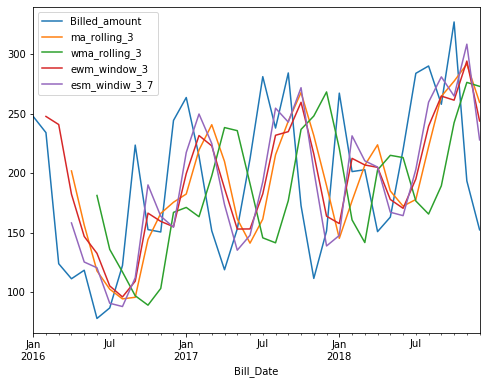

In [42]:
bill_2018.plot()

In [43]:
bill_2018['esm_windiw_3_3'] = bill_2018['Billed_amount'].ewm(alpha = 0.3 , adjust = False ,min_periods = 3).mean().shift(1)

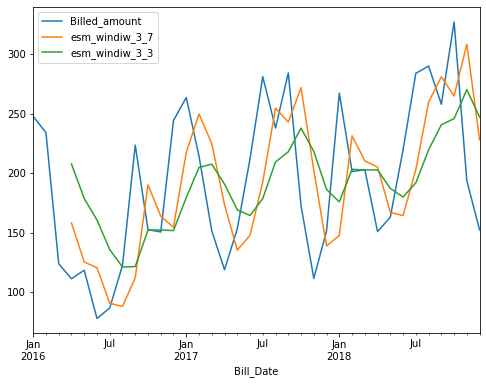

In [44]:
bill_2018[['Billed_amount','esm_windiw_3_7','esm_windiw_3_3']].plot()

In [45]:
bill_2018

,Billed_amount,ma_rolling_3,wma_rolling_3,ewm_window_3,esm_windiw_3_7,esm_windiw_3_3
Bill_Date,,,,,,
2016-01-01,247.73,NaN,NaN,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,247.730000,NaN,NaN
2016-03-01,123.85,NaN,NaN,240.920000,NaN,NaN
2016-04-01,111.22,201.896667,NaN,182.385000,158.153800,207.705800
2016-05-01,118.37,156.393333,NaN,146.802500,125.300140,178.760060
2016-06-01,77.81,117.813333,181.250000,132.586250,120.449042,160.643042
2016-07-01,86.67,102.466667,135.911667,105.198125,90.601713,135.793129
2016-08-01,122.40,94.283333,116.900000,95.934063,87.849514,121.056191
2016-09-01,223.62,95.626667,96.898333,109.167031,112.034854,121.459333


#Evaluation

In [46]:
((bill_2018['Billed_amount']-bill_2018['ma_rolling_3'])**2).mean()**0.5

70.98561687433802

In [47]:
((bill_2018['Billed_amount']-bill_2018['wma_rolling_3'])**2).mean()**0.5

85.25608726256782

In [48]:
((bill_2018['Billed_amount']-bill_2018['ewm_window_3'])**2).mean()**0.5

64.32131239414655

In [49]:
((bill_2018['Billed_amount']-bill_2018['esm_windiw_3_7'])**2).mean()**0.5

61.26408398853503

In [50]:
((bill_2018['Billed_amount']-bill_2018['esm_windiw_3_3'])**2).mean()**0.5

65.22424423118377